In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint.csv'
model_save_path = 'model/keypoint_classifier_5.hdf5'

In [3]:
NUM_CLASSES = 31

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((42,)),  # 21 landmarks * 2 (x, y)
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [8]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2752      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [9]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', # Monitor validation accuracy
    factor=0.2,             # Reduce learning rate by 20%
    patience=5,             # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=0.00001,         # Lower bound on the learning rate
    mode='max',             # Look for maximum val_accuracy
    verbose=1               # Print messages when reducing LR
)

In [10]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=30, verbose=1)

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback, reduce_lr]
)

Epoch 1/1000


155/167 [==========================>...] - ETA: 0s - loss: 3.0289 - accuracy: 0.1859
Epoch 1: saving model to model\keypoint_classifier_5.hdf5
167/167 [==============================] - 2s 5ms/step - loss: 2.9918 - accuracy: 0.1941 - val_loss: 3.2047 - val_accuracy: 0.1385 - lr: 0.0010
Epoch 2/1000
  1/167 [..............................] - ETA: 0s - loss: 2.4441 - accuracy: 0.3438

c:\Users\Abdulrhman Hagras\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/167 [===========================>..] - ETA: 0s - loss: 1.8837 - accuracy: 0.5012
Epoch 2: saving model to model\keypoint_classifier_5.hdf5
167/167 [==============================] - 0s 3ms/step - loss: 1.8555 - accuracy: 0.5088 - val_loss: 2.1444 - val_accuracy: 0.5507 - lr: 0.0010
Epoch 3/1000
155/167 [==========================>...] - ETA: 0s - loss: 1.1362 - accuracy: 0.6843
Epoch 3: saving model to model\keypoint_classifier_5.hdf5
167/167 [==============================] - 0s 3ms/step - loss: 1.1193 - accuracy: 0.6886 - val_loss: 0.9658 - val_accuracy: 0.7787 - lr: 0.0010
Epoch 4/1000
152/167 [==========================>...] - ETA: 0s - loss: 0.7898 - accuracy: 0.7654
Epoch 4: saving model to model\keypoint_classifier_5.hdf5
167/167 [==============================] - 0s 3ms/step - loss: 0.7814 - accuracy: 0.7676 - val_loss: 0.5306 - val_accuracy: 0.8468 - lr: 0.0010
Epoch 5/1000
153/167 [==========================>...] - ETA: 0s - loss: 0.6126 - accuracy: 0.8096
Epoch 5: saving

In [13]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

14/14 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9741


In [14]:
model = tf.keras.models.load_model(model_save_path)

In [15]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 114ms/step
[7.7325130e-10 3.4770292e-05 2.2819966e-11 1.0312795e-11 1.2516401e-08
 8.5764472e-11 9.0227686e-15 4.9553320e-11 8.6614162e-12 4.8190302e-08
 4.8884174e-11 3.8813841e-08 8.2827320e-14 1.2771338e-10 1.0850614e-08
 9.3735554e-11 3.2914758e-11 3.2728750e-12 2.9337190e-12 2.8148678e-13
 6.4123911e-04 9.9932337e-01 1.9218685e-07 5.4215286e-09 1.8012862e-08
 6.5724009e-08 1.6496045e-07 2.9630562e-09 8.2596607e-08 6.5105628e-09
 1.3399842e-08]
21


56/56 [==============================] - 0s 2ms/step


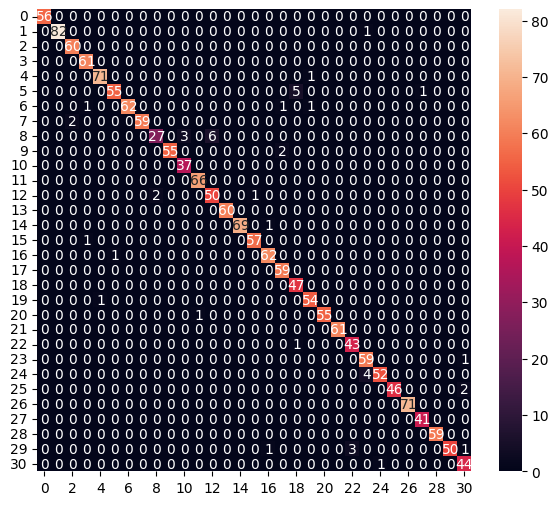

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      0.99      0.99        83
           2       0.97      1.00      0.98        60
           3       0.97      1.00      0.98        61
           4       0.99      0.99      0.99        72
           5       0.98      0.90      0.94        61
           6       1.00      0.95      0.98        65
           7       1.00      0.97      0.98        61
           8       0.93      0.75      0.83        36
           9       1.00      0.96      0.98        57
          10       0.93      1.00      0.96        37
          11       0.99      1.00      0.99        66
          12       0.89      0.94      0.92        53
          13       1.00      1.00      1.00        60
          14       1.00      0.99      0.99        70
          15       0.98      0.98      0.98        58
          16       0.97      0.98      0.98        63
     

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

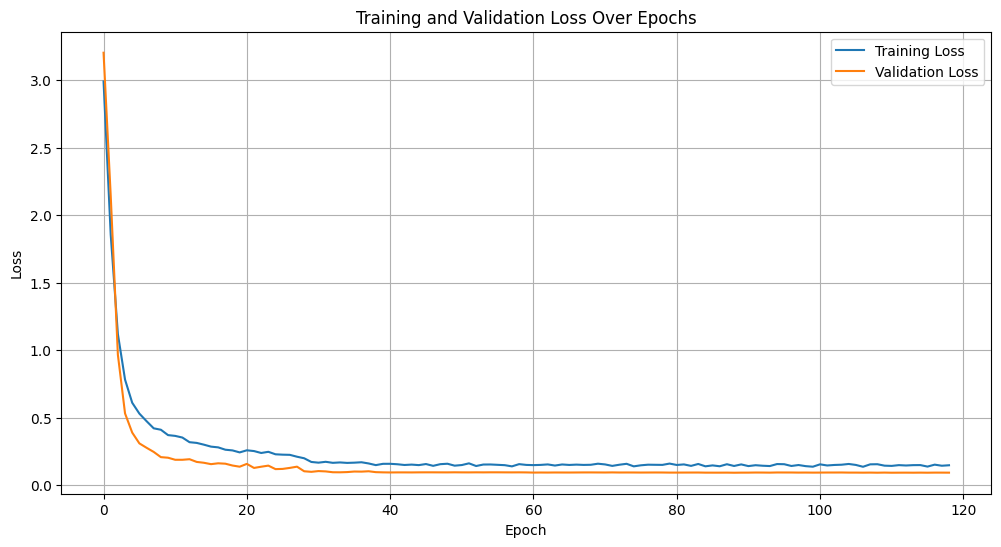

In [ ]:
plt.figure(figsize=(12, 6)) 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True) # Add a grid for better readability
plt.show()

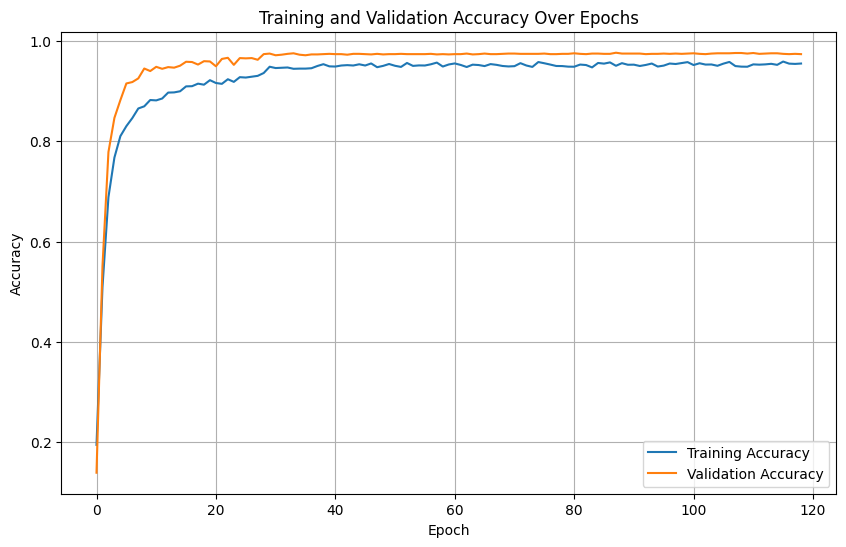

In [ ]:
plt.figure(figsize=(10, 6)) 
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True) # Add a grid for better readability
plt.show()

In [24]:
model.save(model_save_path, include_optimizer=False)

c:\Users\Abdulrhman Hagras\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
tflite_save_path = 'model/keypoint_classifier_5.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ABDULR~1\AppData\Local\Temp\tmpma5oto7d\assets


INFO:tensorflow:Assets written to: C:\Users\ABDULR~1\AppData\Local\Temp\tmpma5oto7d\assets


12512

In [21]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()